# Lab03: Hồi quy tuyến tính.

- MSSV: 18120061
- Họ và tên: Lê Nhựt Nam

## Yêu cầu bài tập

**Cách làm bài**


Bạn sẽ làm trực tiếp trên file notebook này; trong file, từ `TODO` để cho biết những phần mà bạn cần phải làm.

Bạn có thể thảo luận ý tưởng cũng như tham khảo các tài liệu, nhưng *code và bài làm phải là của bạn*. 

Nếu vi phạm thì sẽ bị 0 điểm cho bài tập này.

**Cách nộp bài**

Trước khi nộp bài, rerun lại notebook (`Kernel` -> `Restart & Run All`).

Sau đó, tạo thư mục có tên `MSSV` của bạn (vd, nếu bạn có MSSV là 1234567 thì bạn đặt tên thư mục là `1234567`) Chép file `Lab03-Clustering.ipynb` vào, rồi nén thư mục `MSSV` này lại và nộp ở link trên moodle.

**Nội dung bài tập**

Bài tập 3 là bài tập cá nhân. Trong bài này, bạn sẽ cài đặt thuật toán học máy `Hồi quy tuyến tính`. 


### 1. Tập giả định

- Hồi quy tuyến tính là một mô hình **tuyến tính**, mô hình này giả định tồn tại một mối liên hệ tuyến tính giữa các biến đầu vào (x) và một biến đầu ra (y). Cụ thể hơn, y có thể được tính bằng một tổ hợp tuyến tính của các biến đầu vào (x).
- Một cách tổng quát, một mô hình tuyến tính dự đoán kết quả bằng cách tính tổng trọng số của các đặc trưng đầu vào (hay các biến độc lập). 
$$ \hat{y}=w_0+w_1x_1+w_2x_2+...+w_nx_n $$
    - $\hat{y}$ là giá trị dự đoán.
    - $n$ là số lượng đặc trưng.
    - $x_i$ là giá trị đặc trưng thứ $i$.
    - $w_j$ là tham số thứ $j$ của mô hình.
$$\hat{y}=h_{\mathbf{w}}\left(\mathbf{x}\right)=\mathbf{w}^{T}\cdot\mathbf{x}$$
    - $\mathbf{w}$ **vector trọng số** của mô hình (bao gốm cả $w_0$ và các trọng số đặc trưng $w_1,w_2,...w_n$).
    - $\mathbf{w}^T$ là chuyển vị của $\mathbf{w}$ (vector hàng thay vì vector cột).
    - $\mathbf{x}$ là **vector đầu vào** của các mẫu dữ liệu, *bao gồm* $x_0$ đến $x_n$, với $x_0$ *luôn có giá trị là* 1.
    - $\mathbf{w}^{T}\cdot\mathbf{x}$ là tích vô hướng của 2 vector $\mathbf{w}^T$ và $\mathbf{x}$.
    - $h_{\mathbf{w}}$ là hàm giả thiết, biểu diễn bằng các tham số $\mathbf{w}$.


### 2. Đánh giá hiệu suất và mục tiêu học

- Trước khi huấn luyện dữ liệu, ta cần phải đánh giá mô hình của chúng ta khớp với dữ liệu huấn luyện như thế nào. Cách đánh giá thường được sử dụng nhất là trung bình bình phương độ lỗi **MSE** (Mean Square Error) $\Rightarrow$ ta cần phải tìm $\mathbf{w}$ tối thiểu hóa MSE:
$$\mathbf{w}=\arg\min MSE_{\mathcal{D}_{train}}$$


- MSE trên tập huấn luyện $\mathcal{D}_{train}$ ký hiệu $\left(\mathbf{X},\mathbf{y}\right)$ bao gồm m mẫu $\left\{\left(\mathbf{x}_1,y_1\right),\left(\mathbf{x}_2,y_2\right),...\left(\mathbf{x}_m,y_m\right)\right\}$

$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\sum_{i=1}^{m}\left(\mathbf{w}^T\cdot\mathbf{x}_i - y_i\right )^2$$
$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\Vert\mathbf{X}\mathbf{w}-\mathbf{y}\Vert^2$$

- Để tìm $\mathbf{w}$ sao cho hàm lỗi MSE tối thiểu ta tìm điểm đạo hàm của MSE có giá trị 0. 
$$\mathbf{\hat{w}}=\left(\mathbf{X}^T \cdot \mathbf{X}\right)^{\dagger} \cdot \mathbf{X}^T \cdot \mathbf{y}$$
  - $\mathbf{\hat{w}}$ là giá trị của $\mathbf{w}$ để giảm thiểu độ lỗi. 
  - **Chú ý** $\mathbf{X}^T \cdot \mathbf{X}$ không phải luôn **khả nghịch**. $\left(\mathbf{X}^T \cdot \mathbf{X}\right)^{\dagger}$ là nghịch đảo giả của $\left(\mathbf{X}^T \cdot \mathbf{X}\right)$ - trường hợp nghịch đảo tổng quát kể cả khi ma trận không vuông cũng như không khả nghịch.

### 3. Cài đặt

#### Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import sklearn.datasets as datasets
%matplotlib inline

#### Create data

In [8]:
X,y=datasets.make_regression(n_samples=100,n_features=1, noise=5)

#### Load and visualize data

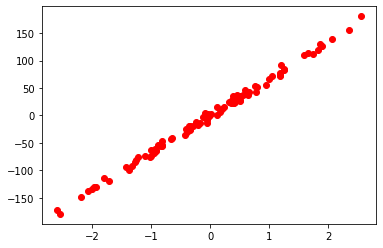

In [9]:
# Visualize data 

plt.plot(X, y, 'ro')
plt.show()


**TODO:** 

- Nhận xét dữ liệu:

#### Training function

In [10]:
def train_linear_regression(X, y):
    '''
    Trains Linear Regression on the dataset (X, y).
    
    Parameters
    ----------
    X : numpy array, shape (m, d + 1)
        The matrix of input vectors (each row corresponds to an input vector); 
        the first column of this matrix is all ones (corresponding to x_0).
    y : numpy array, shape (m, 1)
        The vector of outputs.
    
    Returns
    -------
    w : numpy array, shape (d + 1, 1)
        The vector of parameters of Linear Regression after training.
    '''
    # TODO
    learning_rate = 1e-3
    n_steps = 1000
       
    # random initialization of the model weights
    w = np.random.rand((X.shape[1]))
        
    # iteratively updating W for n_steps
    for i in range(n_steps):
      w = w - learning_rate * (2/X.shape[0] * np.dot(X.T, (np.dot(X, w) - y)))

    return w

In [11]:
# Construct one_added_X 
# TODO:
# First column of one_added_X is all ones (corresponding to x_0).
one_added_X = np.c_[np.ones(X.shape[0]), X]
print ('one_added_X.shape =', one_added_X.shape)
print ('y.shape =', y.shape)
print(one_added_X)
print(y)


one_added_X.shape = (100, 2)
y.shape = (100,)
[[ 1.         -0.03100121]
 [ 1.         -0.81099997]
 [ 1.         -1.27231802]
 [ 1.         -1.70878471]
 [ 1.         -0.01329733]
 [ 1.          0.38511554]
 [ 1.         -1.02212621]
 [ 1.         -0.29385451]
 [ 1.         -0.08751916]
 [ 1.          1.17591179]
 [ 1.         -0.17263344]
 [ 1.         -0.34645756]
 [ 1.          0.65365894]
 [ 1.          1.74552332]
 [ 1.          0.10891663]
 [ 1.         -1.42785769]
 [ 1.         -0.819944  ]
 [ 1.          0.76848669]
 [ 1.         -0.95453065]
 [ 1.          1.04579174]
 [ 1.          1.86988842]
 [ 1.          0.01018955]
 [ 1.         -1.37087439]
 [ 1.          0.61196909]
 [ 1.          2.55591326]
 [ 1.          0.38562473]
 [ 1.         -1.21802711]
 [ 1.          0.50307389]
 [ 1.         -0.97118134]
 [ 1.         -0.65318279]
 [ 1.         -0.40004984]
 [ 1.          0.99681314]
 [ 1.          0.41541498]
 [ 1.          0.94105781]
 [ 1.          0.76331189]
 [ 1.    

#### Train our model and visualize result

[-0.50083097 61.45674422]


(-2.855908656660591, 2.813619065251332)

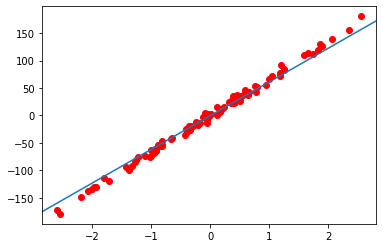

In [14]:
w = train_linear_regression(one_added_X, y)
print(w)
# Visualize result
predicted_ys = one_added_X.dot(w)

plt.plot(X,y,'ro')

x_min, x_max = plt.xlim()
xs = np.array([x_min, x_max]).reshape(-1, 1)

# Construct one_added_xs 
# TODO:
# First column of one_added_xs is all ones (corresponding to x_0).
ones_added_xs =  np.c_[np.ones(xs.shape[0]), xs]

predicted_ys = ones_added_xs.dot(w)
plt.plot(xs, predicted_ys)
plt.xlim(x_min, x_max)




- **TODO**: Điểm mạnh và điểm yếu của `Hồi quy tuyến tính`: